<a href="https://colab.research.google.com/github/ayogkr21/Playstore-Analysis/blob/main/Playstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing various libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Importing Dataset of Playstore

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/playstore-analysis.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## Data clean up – Missing value treatment

#### Drop records where rating is missing since rating is our target/study variable

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
data.dropna(subset=["Rating"], axis=0, inplace = True)

In [12]:
data["Rating"].isnull().sum()

0

Check the null values for the Android Ver column

In [13]:
data["Android Ver"].isnull().sum()

3

## a) Are all 3 records having the same problem?
Ans - Yes, all 3 record have the same problem(NaN).

In [14]:
data.loc[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## b) Drop the 3rd record i.e. record for “Life Made WIFI …”

In [15]:
data.drop([10472], inplace = True)

In [16]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


## c) Replace remaining missing values with the mode

In [17]:
data["Android Ver"].fillna(data["Android Ver"].mode()[0], inplace=True)

In [18]:
data.loc[[4453, 4490]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


## Current ver – replace with most common value

In [19]:
data.loc[data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [20]:
data["Current Ver"].fillna(data["Current Ver"].mode()[0], inplace=True)

In [21]:
data["Current Ver"].isnull().sum()

0

# Data clean up – correcting the data types

### a) Which all variables need to be brought to numeric types?
Ans - There are three variable that is in object data type but they need to be brought to numeric data type.
1. Price
2. Installs
3. Reviews

### b) Price variable – remove $ sign and convert to float

In [22]:
price = []
for i in data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  

In [23]:
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

In [24]:
data.head(2181)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Diabetes & Diet Tracker,MEDICAL,4.6,395,19000.000000,"1,000+",Paid,9.99,Everyone,Medical,"July 16, 2018",6.5.1,5.0 and up
2260,VeinSeek,MEDICAL,2.5,79,21516.529524,"1,000+",Paid,3.99,Everyone,Medical,"December 6, 2017",Varies with device,Varies with device
2261,Block Buddy,MEDICAL,4.0,15,5000.000000,"1,000+",Paid,14.99,Everyone,Medical,"August 1, 2018",7.6.14,4.0 and up
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23000.000000,100+,Paid,2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up


c) Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
Install = []
for j in data["Installs"]:
    Install.append(j.replace(',','').replace('+', '').strip())
data["Installs"] = Install
data["Installs"] = data["Installs"].astype(int)

d) Convert all other identified columns to numeric

In [26]:
data['Price']= data['Price'].astype('float')

In [27]:
data['Installs']= data['Installs'].astype('int')

In [28]:
data['Reviews']= data['Reviews'].astype('float')

### Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play

Are there any such records? Drop if so

In [29]:
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Ans - All the values of average rating lies in between 1 and 5.There is no such average rating whose values is less than 1 and greater than 5.

### b. Reviews should not be more than installs as only those who installed can review the app.

Are there any such records? Drop if so?

In [30]:
data.loc[data.Reviews > data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Ans - Yes, there are seven records in which Reviews is greater than Installs.

In [31]:
tempdata = data[data.Reviews > data.Installs].index
data.drop(labels=tempdata, inplace = True)

In [32]:
data.loc[data.Reviews > data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Identify and handle outliers –

## Price column
i. Make suitable plot to identify outliers in price

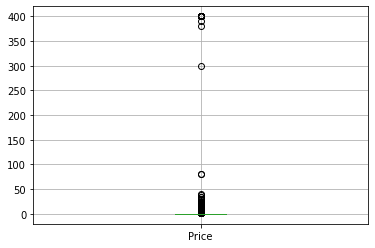

In [33]:
data.boxplot(column='Price')

## Do you expect apps on the playstore to cost $200? Check out these cases

In [34]:
data.loc[data.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Yes, There are many record in this playstore data in which app price value is greater than 200.

## Limit data to records with price < $30

In [35]:
price30 = data[data.Price > 30].index
data.drop(labels=price30, inplace=True)
print("Total number of deleted record is ",price30.value_counts().sum())

Total number of deleted record is  21


### After dropping the useless records, make the suitable plot again to identify outliers

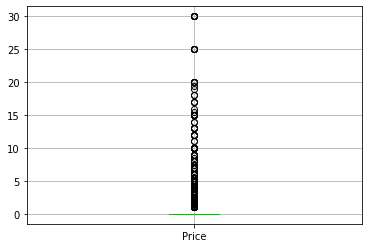

In [36]:
data.boxplot(column='Price')

Reviews column

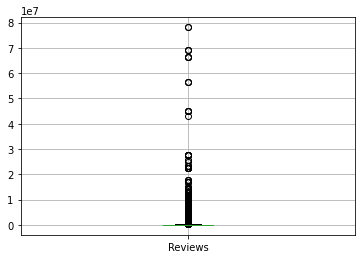

In [37]:
data.boxplot(column='Reviews')

In [38]:
reviews1m = data[data.Reviews>1000000].index
data.drop(labels=reviews1m, inplace = True)
print("Total number of deleted record in Reviews column is ",reviews1m.value_counts().sum())

Total number of deleted record in Reviews column is  704


Installs

i. What is the 95th percentile of the installs?

In [39]:
Pecentile95 = data.Installs.quantile(0.95)
print("The value of 95 percentile of Installs is - ",Pecentile95)

The value of 95 percentile of Installs is -  10000000.0


Drop records having a value more than the 95th percentile

In [40]:
data.loc[data.Installs>10000000].count()

App               199
Category          199
Rating            199
Reviews           199
Size              199
Installs          199
Type              199
Price             199
Content Rating    199
Genres            199
Last Updated      199
Current Ver       199
Android Ver       199
dtype: int64

In [41]:
percentilelimit95 = data[data.Installs>10000000].index

In [42]:
data.drop(labels=percentilelimit95, inplace = True)
print("Total number of deleted record in Percentile column is ", percentilelimit95.value_counts().sum())

Total number of deleted record in Percentile column is  199


# Data Analysis

What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


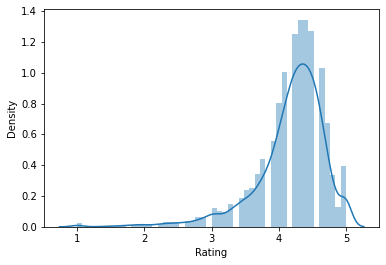

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107292 of this distribution


In [44]:
sns.distplot(data['Rating'])
plt.show()
print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

implication of  analysis

In [46]:
data['Rating'].mode()

0    4.3
dtype: float64

Since mode> median > mean, the distribution of Rating is Negatively Skewed.
Therefore distribution of Rating is more Skewed towards lower values.



### Top Content Rating values

In [47]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adult only 18+  and Underated have very few records

In [48]:
data.drop(data[data['Content Rating']=='Adults only 18+'].index, inplace =True)

In [49]:
data.drop(data[data['Content Rating']=='Unrated'].index, inplace =True)

In [50]:
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

#Effect of size on rating

Joinplot to understand the effect of size on rating

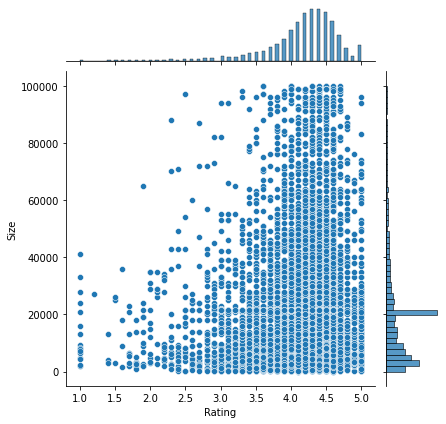

In [51]:
# data = sns.load_dataset("data")
sns.jointplot(y='Size', x='Rating',kind='scatter',data=data)
plt.show()

patterns can be observed between Size and Rating. Most of the Playstore Rating lie in range 3.5 to 5 and most of the playstore Size lie in range 0 to 40000.

Most of the Playstore Rating lie in range 3.5 to 5 and most of the playstore Size lie in range 0 to 40000. 
As the value of Rating increases the value of size also increases but at a certain point it seems to be constant. 
Therefore, there is a possitive relation in between Size and Rating.

# Effect of price on rating

Make a jointplot (with regression line)

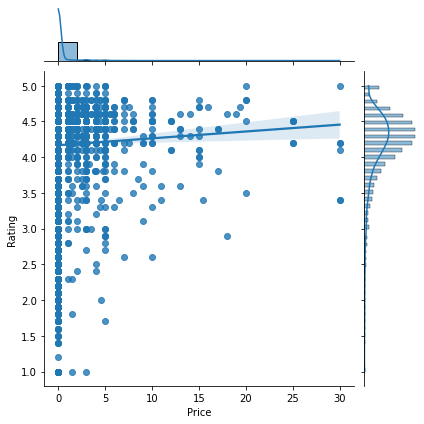

In [52]:
sns.jointplot(x='Price', y='Rating', kind='reg',data=data)
plt.show()

Pattern show the following points- 
 
1. Most of the Rating lies in range  3.5 to 5.
2. Most of the value of Price lies in range 0 to 5. 
3.     After a certain value of Price, Rating almost constant 
4.    The regression line show the relation between Price and Rating.

Rating is represented on y-axis and Price is represented on x-axis in the jointplot. 
Regression line is also represented on the jointplot which show the relation between Rating and Price.
Most of the Price lies in range 0 to 5 and most of the Rating lies in range 3.5 to 5.
As the value of price is increases rating is also increases but a very slow rate. 
After a certain point(Price=5) Price increases but the Rating almost like constant
Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

## Replot the data, this time with only records with price > 0

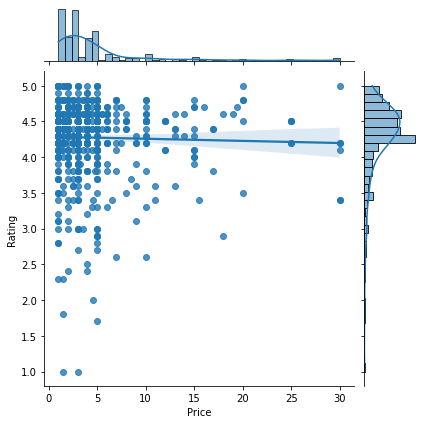

In [53]:
priceabove0 =data.loc[data.Price>0]
sns.jointplot(x='Price',y='Rating',  kind='reg', data=priceabove0)

Question- Does the pattern change?

Yes, pattern changes when we apply condition that price should be greater than 0. It is less from the previous one in which condition is not apply.

The value of the rating is mostly lie in range between 4 to 5. 
    As the price greater than 5 the Rating almost constant irespective of change in price.
    There is a weak correlation in between Rating and Price

# Pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

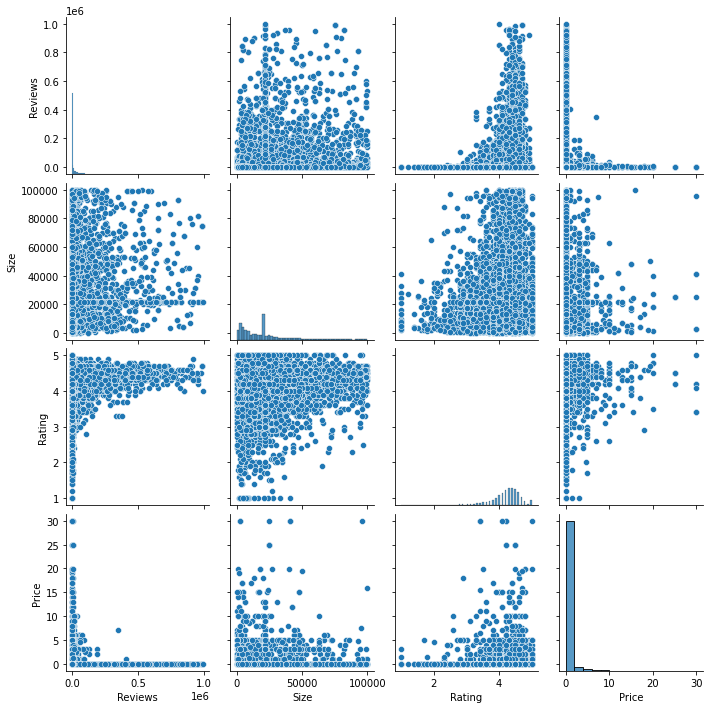

In [55]:
sns.pairplot(data, vars=['Reviews','Size', 'Rating', 'Price'])
plt.show()

# Rating vs. content rating

Bar plot displaying the rating for each content rating

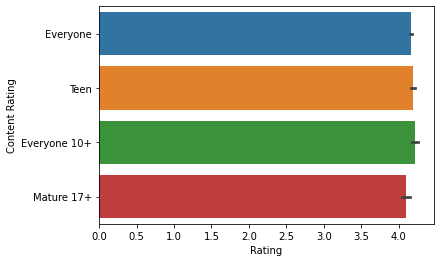

In [56]:
sns.barplot(x='Rating', y='Content Rating', data= data)

Mean? Median? Some other quantile?

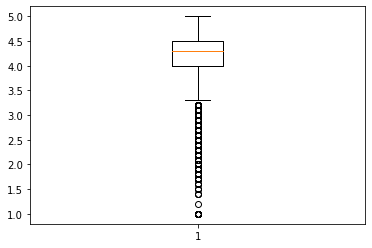

In [57]:
plt.boxplot(data['Rating'])
plt.show()

the right metric and plot

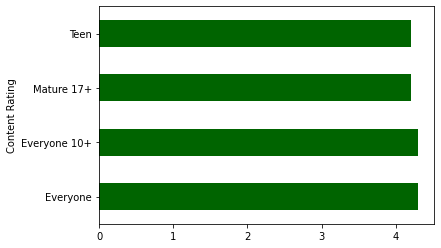

In [58]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

## Content rating vs. size vs. rating – 3 variables at a time

Create 5 buckets (20% records in each) based on Size

In [59]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [60]:
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc = lambda x:np.percentile(x,25))

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.9,4.100,3.6,4.0
20k-40k,4.0,4.000,4.0,4.0
40k-60k,4.0,4.100,4.1,4.0
60k-80k,4.0,4.125,4.0,4.1
80k-100k,4.1,4.100,4.0,4.1


## Heatmap of this

In [61]:
pivotd = pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc = lambda x:np.percentile(x,25))

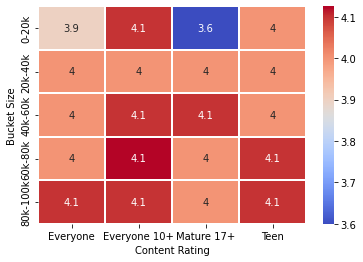

In [62]:
sns.heatmap(pivotd,  annot=True, linewidth = 0.9, cmap='coolwarm')
plt.show()

According to given data heavier size apps have higher rating than lighter size apps. 
Rating vs Size vs Content Rating represented in heat map that show heavier app Size (60-80, 80-100) have higher Rating(4-4.1) in all category.
Therefore, insights come from the data is heavier app Size is most preferable for all category.